# Прогнозирование цен на дома с помощью линейной регрессии

## Объяснение набора данных

### Набор данных о продажах домов в округе Кинг

Набор данных о продажах домов в округе Кинг содержит цены на продажу домов в округе Кинг, включая Сиэтл. Он включает дома, проданные в период с мая 2014 года по май 2015 года. Этот набор данных идеально подходит для оценки простых моделей регрессии. Вы можете найти его на Kaggle: [Ссылка на набор данных](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction).

### Характеристики

Набор данных включает следующие характеристики:

- **id**: Уникальный идентификатор для каждого дома.
- **date**: Дата продажи дома.
- **price**: Цена продажи дома.
- **bedrooms**: Количество спален.
- **bathrooms**: Количество ванных комнат.
- **sqft_living**: Площадь жилого помещения в квадратных футах.
- **sqft_lot**: Площадь участка в квадратных футах.
- **floors**: Количество этажей.
- **waterfront**: Наличие вида на водоем.
- **view**: Качество вида из дома.
- **condition**: Состояние дома.
- **grade**: Общая оценка дома.
- **sqft_above**: Площадь дома без учета подвала в квадратных футах.
- **sqft_basement**: Площадь подвала в квадратных футах.
- **yr_built**: Год постройки дома.
- **yr_renovated**: Год ремонта дома.
- **zipcode**: Почтовый индекс местоположения дома.
- **lat**: Координата широты.
- **long**: Координата долготы.
- **sqft_living15**: Площадь жилого помещения в 2015 году.
- **sqft_lot15**: Площадь участка в 2015 году.

Отсутствующие значения атрибутов: Нет

### Загрузка набора данных

Вы можете загрузить набор данных, используя следующий код:



In [1]:
import pandas as pd
import requests

def download_dataset(url: str, filename: str) -> None:
    """Загружает набор данных с указанного URL и сохраняет его в файл.

    Аргументы:
        url (str): URL, с которого нужно загрузить набор данных.
        filename (str): Имя файла, в который будет сохранен набор данных.

    Выводит:
        Сообщение, указывающее, был ли набор данных успешно загружен и сохранен,
        или загрузка не удалась.
    """
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, 'wb') as file:
            file.write(response.content)
        print(f"Набор данных загружен и сохранен как {filename}")
    else:
        print("Не удалось загрузить набор данных")

# URL набора данных
dataset_url = "https://drive.google.com/uc?export=download&id=1S_G1i2iktVCY7ooHMmJSH3O7SjxPNycK"
# Имя файла для сохранения набора данных
filename = "kc_house_data-2.csv"

# Загрузка набора данных
download_dataset(dataset_url, filename)

/Users/marinasegaj/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Набор данных загружен и сохранен как kc_house_data-2.csv



## Понимание `train_test_split`

Функция `train_test_split` из модуля `sklearn.model_selection` используется для разделения вашего набора данных на обучающую и тестовую выборки. Это важно для оценки производительности вашей модели машинного обучения.

- **Обучающая выборка**: Используется для обучения модели.
- **Тестовая выборка**: Используется для оценки производительности модели на новых данных.

Функция принимает в качестве входных данных признаки и целевую переменную и возвращает четыре выхода: `X_train`, `X_test`, `y_train`, `y_test`. Вы можете указать размер тестовой выборки, используя параметр `test_size`, и использовать `random_state` для обеспечения воспроизводимости.
Примечание: Установите random_state в **123** для воспроизводимости.

## Цели задачи

1. **Загрузить набор данных о продажах домов в округе Кинг**: Используйте библиотеку `pandas` для загрузки набора данных.
2. **Выбрать характеристику**: Выберите одну или несколько характеристик для использования в качестве предикторных переменных.
3. **Реализовать линейную регрессию**: Используйте нормальное уравнение для расчета параметров модели линейной регрессии.
4. **Сделать прогнозы**: Используйте модель для прогнозирования цен на дома и визуализируйте результаты.

## Шаги для выполнения задачи

1. **Загрузить набор данных**: Используйте предоставленный код для загрузки набора данных о продажах домов в округе Кинг.

2. **Выбрать характеристику**: Выберите одну или несколько характеристик из набора данных для использования в качестве предикторных переменных.

3. **Реализовать линейную регрессию**: Используйте нормальное уравнение для расчета параметров $\beta_0$ и $\beta_1$.



$$
\beta = (X^T X)^{-1} X^T y
$$
4. **Сделать прогнозы**: Используйте рассчитанные параметры для прогнозирования цен на дома для тестовой выборки.

5. **Визуализировать результаты**: Постройте график исходных данных и линии линейной регрессии.

## Пример кода для построения графиков с помощью Matplotlib

Вы можете использовать этот пример кода, чтобы научиться строить графики данных и линии линейной регрессии с помощью Matplotlib.
Примечание: Этот код предназначен для справки и может потребовать модификации в зависимости от вашей реализации.



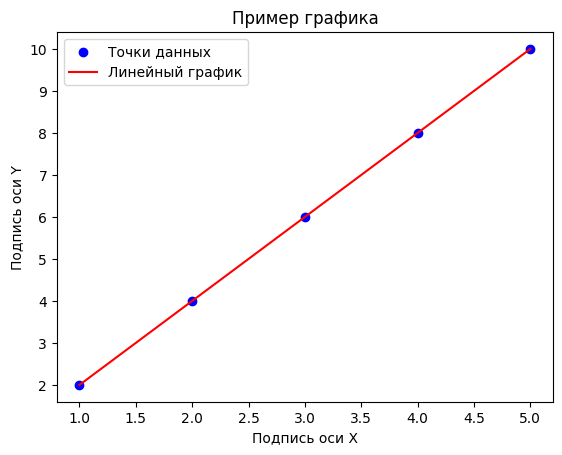

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Пример данных
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])

# Создание точечного графика
plt.scatter(X, y, color='blue', label='Точки данных')

# Создание линейного графика
plt.plot(X, y, color='red', label='Линейный график')

# Добавление подписей и заголовка
plt.xlabel("Подпись оси X")
plt.ylabel("Подпись оси Y")
plt.title("Пример графика")

# Добавление легенды
plt.legend()

# Показать график
plt.show()


## Результаты

- Скрипт на Python, реализующий вышеуказанные шаги.
- График, показывающий исходные данные и линию линейной регрессии.

## Решение



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd

# Ваш код здесь
# Загружаем данные
df = pd.read_csv("kc_house_data-2.csv")
# Выводим первые 5 строк
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503


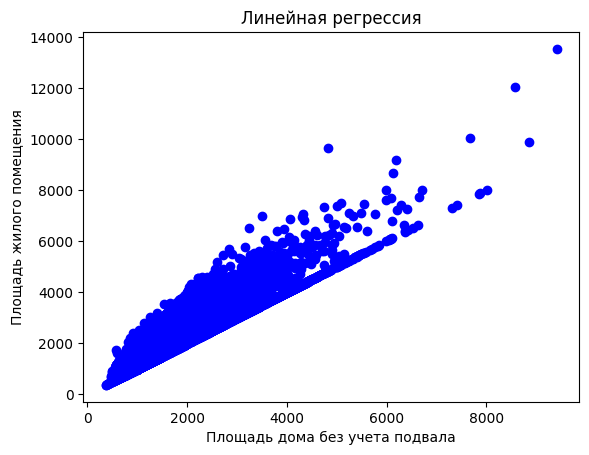

In [7]:
# Построим график
X=df.sqft_above.values
Y=df.sqft_living.values
# Создание точечного графика
plt.scatter(X, Y, color='b', marker='o')
# Настройка графика
plt.xlabel('Площадь дома без учета подвала')
plt.ylabel('Площадь жилого помещения')
plt.title("Линейная регрессия")
plt.show()




In [12]:

# Добавление столбца единиц к X для перехвата
X_b = np.c_[np.ones((X.shape[0], 1)), X] 
# Вычисление оптимальных параметров с использованием нормального уравнения
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)

print("Перехват (beta_0):", theta_best[0])
print("Наклон (beta_1):", theta_best[1])


Перехват (beta_0): 341.6121839436146
Наклон (beta_1): 0.9721082053457281


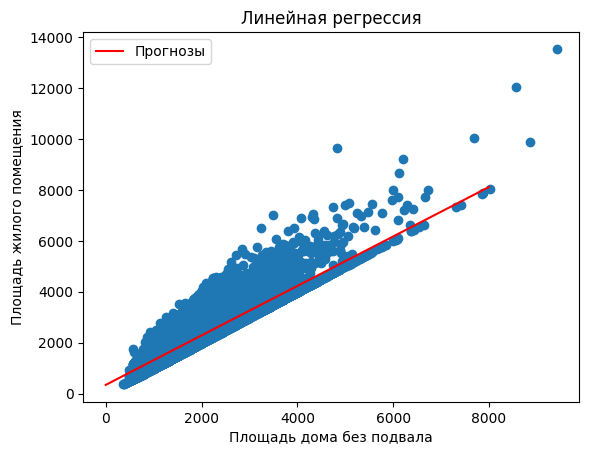

In [13]:
# Прогнозирование с использованием модели
X_new = np.array([[0], [8000]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)

# Построение графика прогнозов
plt.plot(X_new, y_predict, "r-", label="Прогнозы")
plt.scatter(X, Y)
plt.xlabel("Площадь дома без подвала")
plt.ylabel("Площадь жилого помещения")
plt.title("Линейная регрессия")
plt.legend()
plt.show()



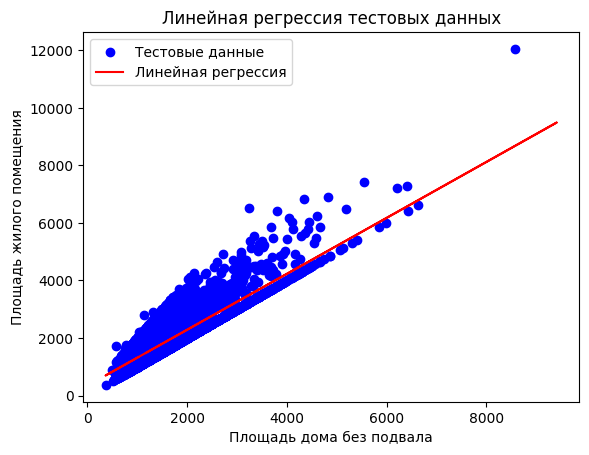

In [14]:
from sklearn.linear_model import LinearRegression

# Преобразование X в 2D массив
X = X.reshape(-1, 1)

# Разделение данных: 80% — обучение, 20% — тест
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

# Обучение модели
model = LinearRegression()
model.fit(X_train, Y_train)


# Визуализация
plt.scatter(X_test, Y_test, color='blue', label='Тестовые данные')
plt.plot(X, model.predict(X), color='red', label='Линейная регрессия')
plt.xlabel("Площадь дома без подвала")
plt.ylabel("Площадь жилого помещения")
plt.title("Линейная регрессия тестовых данных")
plt.legend()
plt.grid(False)
plt.show()


In [15]:
# 2. Вычисляем MSE для обучающей выборки
Y_train_predict = model.predict(X_train)
mse_train = np.mean((Y_train - Y_train_predict) ** 2)

print(f"Среднеквадратичная ошибка (MSE) для обучающей выборки: {mse_train:.3f}")

Среднеквадратичная ошибка (MSE) для обучающей выборки: 194681.036


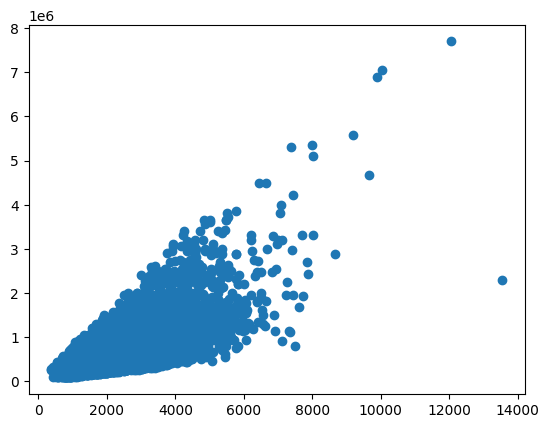

In [25]:
# Построим график
X=df.sqft_living.values
X_1=df.sqft_above.values
Y=df.price.values
# Создание точечного графика
plt.scatter(X,Y)


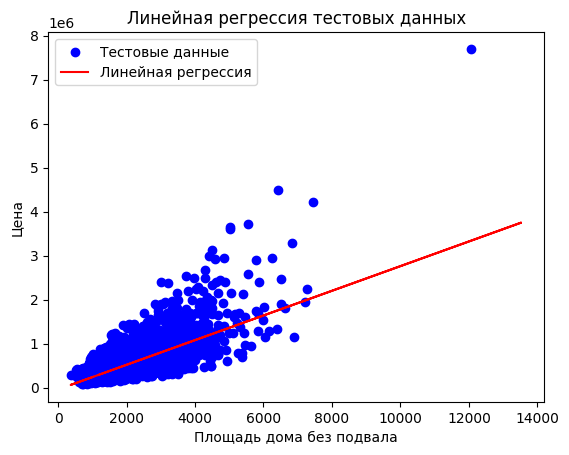

In [24]:
from sklearn.linear_model import LinearRegression

# Преобразование X в 2D массив
X = X.reshape(-1, 1)

# Разделение данных: 80% — обучение, 20% — тест
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

# Обучение модели
model = LinearRegression()
model.fit(X_train, Y_train)


# Визуализация
plt.scatter(X_test, Y_test, color='blue', label='Тестовые данные')
plt.plot(X, model.predict(X), color='red', label='Линейная регрессия')
plt.xlabel("Площадь дома без подвала")
plt.ylabel("Цена")
plt.title("Линейная регрессия тестовых данных")
plt.legend()
plt.grid(False)
plt.show()

In [33]:
# 2. Вычисляем MSE для обучающей выборки
Y_train_predict = model.predict(X_train)
mse_train = np.mean((Y_train - Y_train_predict) ** 2)

print(f"Среднеквадратичная ошибка (MSE) для обучающей выборки: {mse_train:.3f}")

Среднеквадратичная ошибка (MSE) для обучающей выборки: 68105470852.352


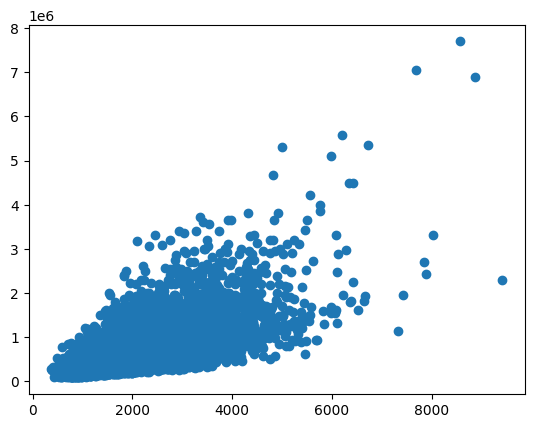

In [22]:
# Построим график
X=df.sqft_living.values
X_1=df.sqft_above.values
Y=df.price.values
# Создание точечного графика
plt.scatter(X_1,Y)

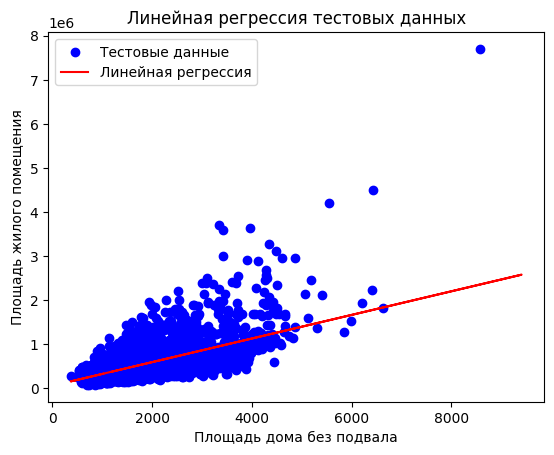

In [ ]:
from sklearn.linear_model import LinearRegression

# Преобразование X в 2D массив
X_1 = X_1.reshape(-1, 1)

# Разделение данных: 80% — обучение, 20% — тест
X_1_train, X_1_test, Y_train, Y_test = train_test_split(X_1, Y, test_size=0.2, random_state=123)

# Обучение модели
model = LinearRegression()
model.fit(X_1_train, Y_train)


# Визуализация
plt.scatter(X_1_test, Y_test, color='blue', label='Тестовые данные')
plt.plot(X_1, model.predict(X_1), color='red', label='Линейная регрессия')
plt.xlabel("Площадь дома без подвала")
plt.ylabel("Цена")
plt.title("Линейная регрессия тестовых данных")
plt.legend()
plt.grid(False)
plt.show()

In [27]:
# 2. Вычисляем MSE для обучающей выборки
Y_train_predict = model.predict(X_1_train)
mse_train_1 = np.mean((Y_train - Y_train_predict) ** 2)

print(f"Среднеквадратичная ошибка (MSE) для обучающей выборки: {mse_train:.3f}")


Среднеквадратичная ошибка (MSE) для обучающей выборки: 92012197193.119


In [34]:
# Выведем MSE для X и X_1
print("MSE для X (train):", mse_train, "\nMSE для X_1 (train):", mse_train_1)

MSE для X (train): 68105470852.351685 
MSE для X_1 (train): 92012197193.11876



### Как отправить проект

1. Создайте файл Jupyter Notebook на вашем Google Диске.
2. Напишите ваше решение в блокноте.
3. Предоставьте доступ вашему наставнику (или предоставьте ссылку с правами на редактирование).
4. Отправьте ссылку на файл блокнота или папку в качестве вашего решения для этого урока.